<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/Assignment_Simple_Linear_Regression_DeliveryTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

resend :. Try to build models by applying transformational models like log, square, sqrt and calculate those rmse values. RESUBMIT.

In [ ]:
# Uplaod the file
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
#Read the uploaded csv file
delTime=pd.read_csv("delivery_time.csv")
delTime.head()   #check the first five data points of the data set

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


##EDA and Data Visualization

<ipython-input-4-a79a3d2fc00f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delTime["Delivery Time"]); #plotting delievery time


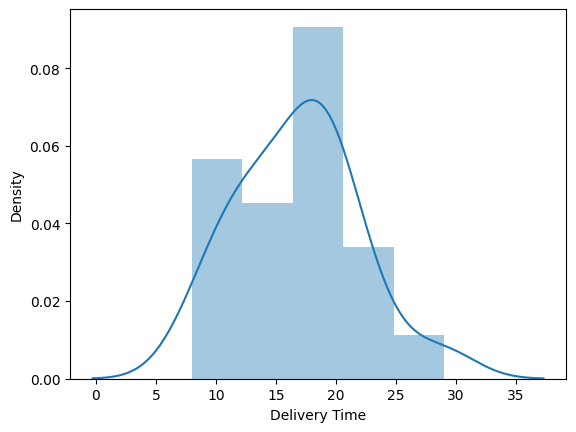

In [ ]:
sns.distplot(delTime["Delivery Time"]); #plotting delievery time

<ipython-input-6-890b21805d47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delTime["Sorting Time"])  # Plotting dorting time


<Axes: xlabel='Sorting Time', ylabel='Density'>

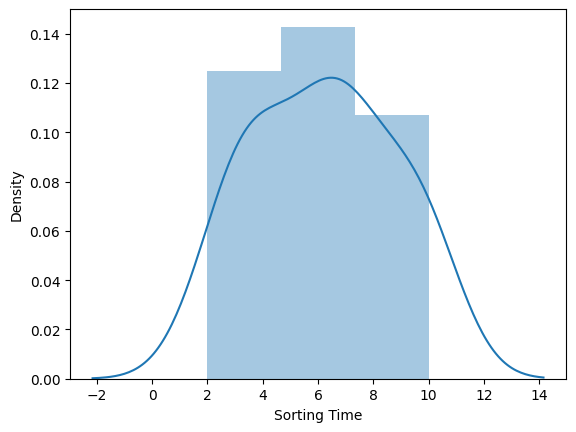

In [ ]:
sns.distplot(delTime["Sorting Time"])  # Plotting dorting time

<ipython-input-9-de8a3303a5fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_SortingTime)


<Axes: xlabel='Sorting Time', ylabel='Density'>

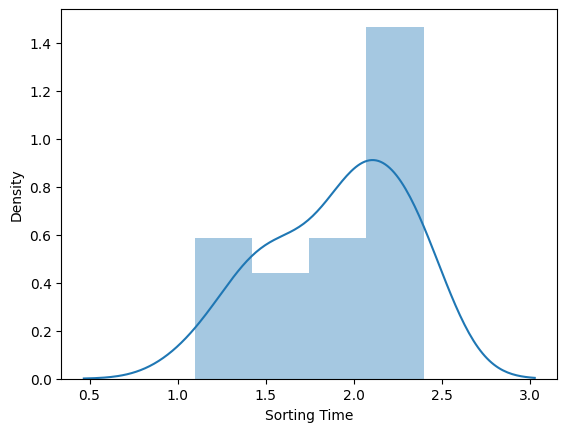

In [ ]:
# performing log transformation
log_SortingTime=np.log1p(delTime["Sorting Time"])
sns.distplot(log_SortingTime);

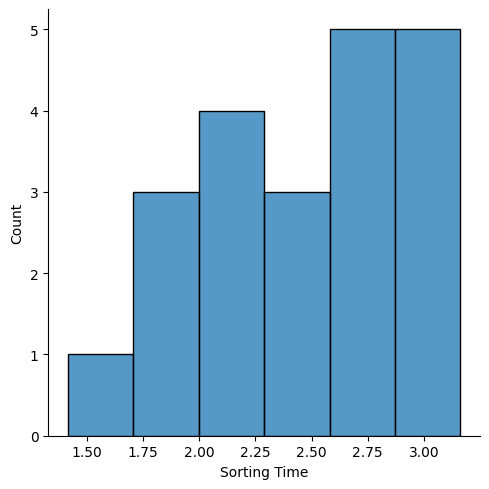

In [ ]:
# performing square root transformation
Sqrt_SortingTime=delTime["Sorting Time"]**(1/2)
sns.displot(Sqrt_SortingTime);

<Axes: >

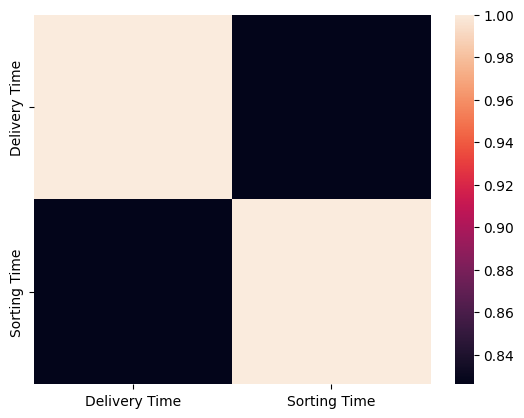

In [ ]:
Corr=delTime.corr()
Corr
sns.heatmap(Corr)

##Feature Engineering

In [ ]:
#renaming the columns as we have space in between the names
delTime=delTime.rename({"Delivery Time": "Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
delTime.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


##Model Building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=delTime).fit()


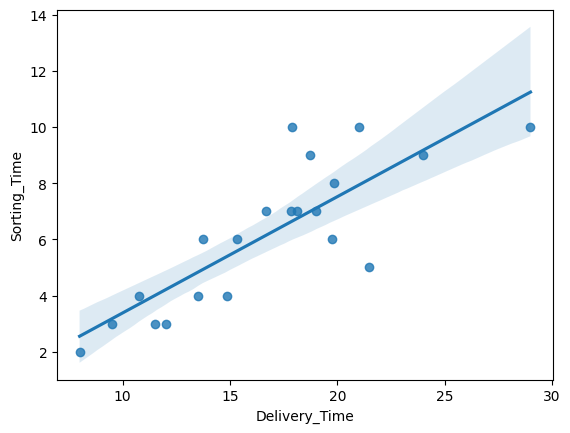

In [ ]:
#plotting the model
sns.regplot(x="Delivery_Time" , y="Sorting_Time",data=delTime);

Model Testing

In [ ]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
model.rsquared,model.rsquared_adj  # finding R square values (accuracy of the model)

(0.6822714748417231, 0.6655489208860244)

Model Predictions for new values:


In [ ]:
#Predicting the delievery time on basis of new data
new_data=pd.Series([4,6,8,10])
df=pd.DataFrame(new_data,columns=["Sorting_Time"])
df

,Sorting_Time
0,4
1,6
2,8
3,10


In [ ]:
y_pred=model.predict(df)
y_pred

0    13.178814
1    16.476853
2    19.774893
3    23.072933
dtype: float64

In [ ]:
df

,Sorting_Time
0,4
1,6
2,8
3,10


In [ ]:
#Checking for MSE
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error(MSE): %.2f" % mean_squared_error(df.Sorting_Time, y_pred))

Mean squared error(MSE): 125.89


In [ ]:
 print("Coefficient of determination: %.3f" % r2_score(df.Sorting_Time, y_pred))

Coefficient of determination: -24.178
